In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [2]:
logFile = "file:///home/jovyan/seven_stairs_excerpt.txt"

In [3]:
logData = sc.textFile(logFile).cache()

In [4]:
logData.count()

114

In [5]:
logData.first()

'  1'

In [6]:
numAs = logData.filter(lambda s: 'a' in s).count()
numBs = logData.filter(lambda s: 'b' in s).count()

print('Lines with a: %i' % numAs)
print('Lines with b: %i' % numBs)


Lines with a: 88
Lines with b: 58


In [7]:
wordCounts = logData.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)

In [8]:
wordCounts.collect()

[('Came', 1),
 ('I', 42),
 ('might', 1),
 ('as', 2),
 ('well', 1),
 ('you', 3),
 ('what', 2),
 ('this', 4),
 ('about.', 1),
 ('ago', 1),
 ('started', 1),
 ('to', 23),
 ('write', 1),
 ('memoir', 1),
 ('about', 6),
 ('dealer', 2),
 ('and', 27),
 ('how', 1),
 ('out.', 1),
 ('it', 6),
 ('up', 2),
 ('covered', 1),
 ('by', 3),
 ('_How', 1),
 ('Become', 1),
 ('Extinct_.', 1),
 ('Now', 1),
 ('so', 6),
 ('sure.', 1),
 ('still', 3),
 ('around', 1),
 ('us', 1),
 ('are', 1),
 ('withering', 1),
 ('me', 2),
 ('yet', 1),
 ('state', 1),
 ('of', 27),
 ('tragedy', 1),
 ('really', 1),
 ('believe', 1),
 ('Maybe', 1),
 ('just', 2),
 ('isn’t', 1),
 ('enough', 2),
 ('left', 2),
 ('with', 7),
 ('howl', 2),
 ('stricken', 1),
 ('trap.', 1),
 ('self-pity,', 1),
 ('but', 2),
 ('yap', 1),
 ('human', 1),
 ('spirit', 2),
 ('determined', 1),
 ('no', 7),
 ('matter', 1),
 ('what.', 1),
 ('yet,', 1),
 ('would', 1),
 ('submitting', 1),
 ('Let', 1),
 ('doubt', 1),
 ('for', 6),
 ('Candide.', 1),
 ('three', 2),
 ('dollars',

In [12]:
book_file = "file:///home/jovyan/wonderland.txt"  

In [13]:
book_data = sc.textFile(book_file).cache()

In [14]:
print("Total lines:", book_data.count())

Total lines: 3757


In [15]:
print("First line:", book_data.first())

First line: The Project Gutenberg eBook of Alice's Adventures in Wonderland


In [16]:
print("First 5 lines:", book_data.take(5))

First 5 lines: ["The Project Gutenberg eBook of Alice's Adventures in Wonderland", '    ', 'This ebook is for the use of anyone anywhere in the United States and', 'most other parts of the world at no cost and with almost no restrictions', 'whatsoever. You may copy it, give it away or re-use it under the terms']


In [17]:
sample_lines = book_data.takeSample(withReplacement=False, num=5, seed=42)
print("Sample lines:", sample_lines)

Sample lines: ['Gryphon answered, very nearly in the same words as before, “It’s all', 'in questions of eating and drinking.', 'last she stretched her arms round it as far as they would go, and broke', '', '[later editions continued as follows']


In [18]:
total_chars = book_data.map(lambda line: len(line)).reduce(lambda a, b: a + b)
print("Total characters:", total_chars)

Total characters: 160160


In [21]:
word_rdd = book_data.flatMap(lambda line: line.split())
word_counts = word_rdd.countByValue()
print("Word counts (sample):", {k: word_counts[k] for k in list(word_counts)[:10]})

Word counts (sample): {'The': 106, 'Project': 79, 'Gutenberg': 22, 'eBook': 4, 'of': 604, "Alice's": 2, 'Adventures': 4, 'in': 406, 'Wonderland': 4, 'This': 18}


In [23]:
zero_value = (0, 0)
seq_op = lambda acc, line: (acc[0] + len(line), acc[1] + 1)
comb_op = lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])
total_chars, total_lines = book_data.aggregate(zero_value, seq_op, comb_op)
print("Total characters:", total_chars)
print("Total lines:", total_lines)

Total characters: 160160
Total lines: 3757


In [24]:
word_counts = book_data.flatMap(lambda line: line.split()) \
                       .map(lambda word: (word.lower(), 1)) \
                       .reduceByKey(lambda a, b: a + b)


In [25]:
# Define stopwords
stopwords = set(["the", "and", "to", "of", "a", "in", "that", "it", "is", "was", "for", "on", "with", "as", "by"])

# Filter out stopwords from the word count RDD
filtered_word_counts = word_counts.filter(lambda x: x[0] not in stopwords)


In [26]:
# Get the top 10 most frequent words
top_words = filtered_word_counts.takeOrdered(10, key=lambda x: -x[1])
for word, count in top_words:
    print(f"{word}: {count}")


she: 518
said: 420
you: 330
i: 249
alice: 221
at: 217
her: 207
had: 176
all: 171
be: 155


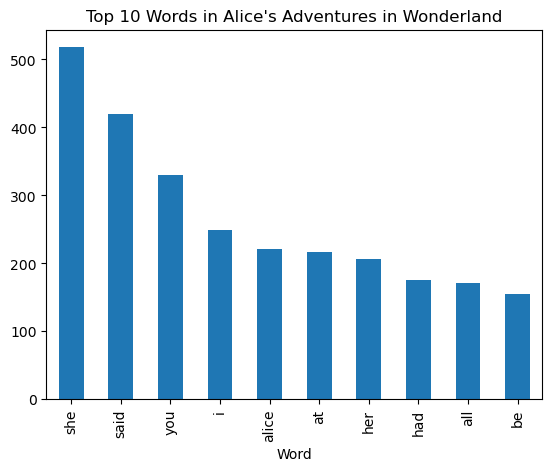

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to a DataFrame for visualization
df = pd.DataFrame(top_words, columns=["Word", "Count"])

# Plot the top 10 words
df.plot(kind='bar', x='Word', y='Count', legend=False)
plt.title("Top 10 Words in Alice's Adventures in Wonderland")
plt.show()

In [28]:
import pandas as pd

# Convert the RDD (e.g., filtered_word_counts) to a DataFrame
top_words = filtered_word_counts.takeOrdered(100, key=lambda x: -x[1])  # Top 100 words
df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Export to CSV
df.to_csv('word_frequencies.csv', index=False)
print("Data exported to word_frequencies.csv")


Data exported to word_frequencies.csv


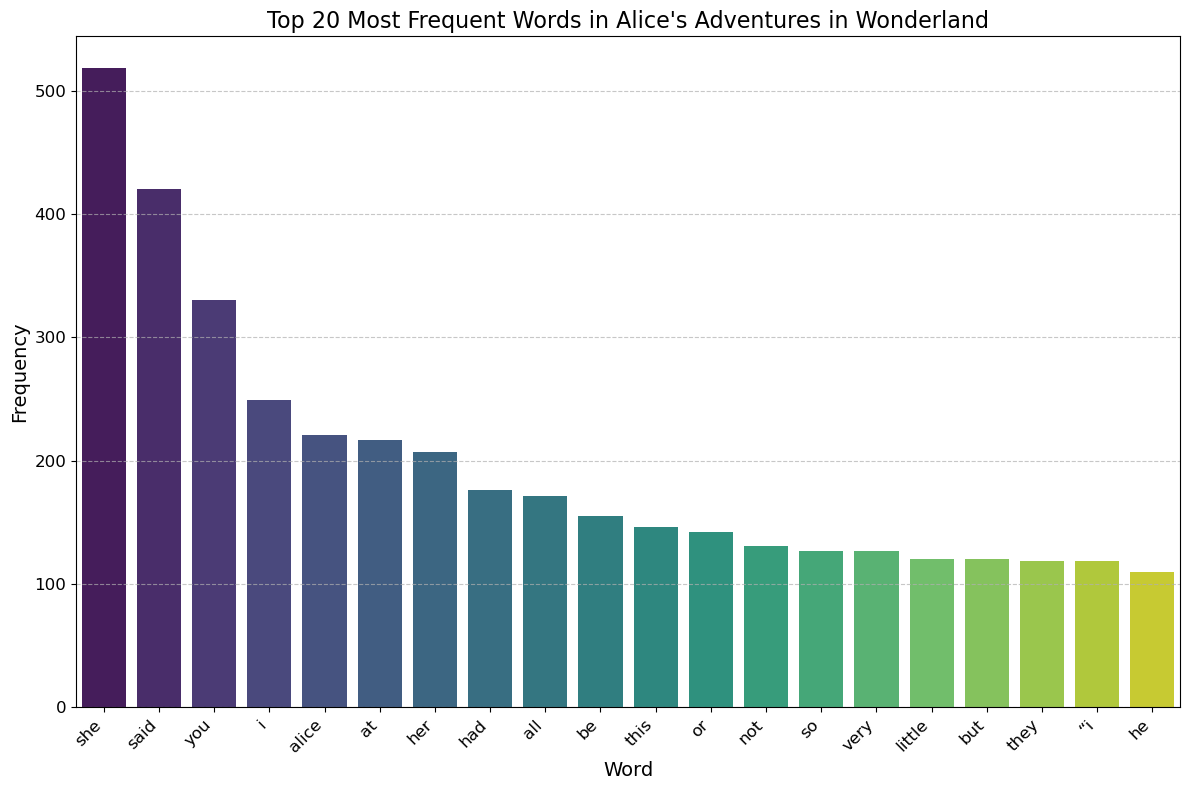

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit to the top 20 words for clarity
top_20_words = df.head(20)

# Create a larger figure and plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Frequency', data=top_20_words, palette='viridis', hue='Word', dodge=False)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Top 20 Most Frequent Words in Alice's Adventures in Wonderland", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False) 
plt.tight_layout() 
plt.show()

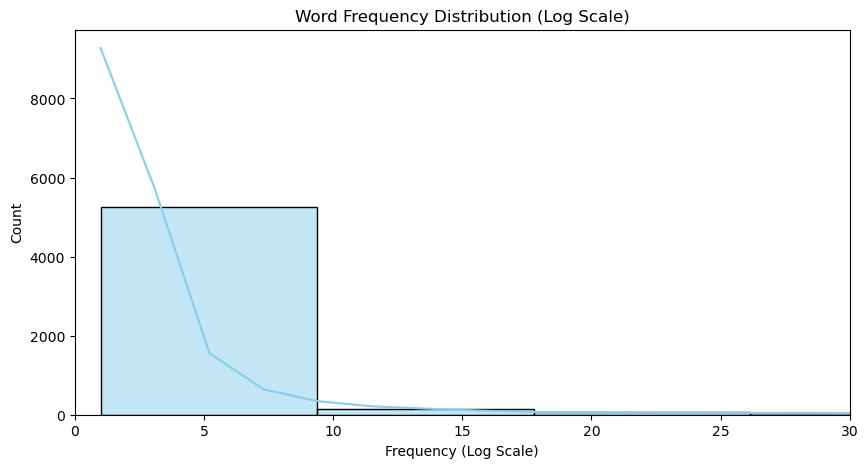

In [63]:
word_frequencies = [count for word, count in filtered_word_counts.collect()]
plt.figure(figsize=(10, 5))
sns.histplot(word_frequencies, bins=50, kde=True, color='skyblue')
plt.xlim(0, 30)  # Apply logarithmic scale for better distribution visualization
plt.title('Word Frequency Distribution (Log Scale)')
plt.xlabel('Frequency (Log Scale)')
plt.ylabel('Count')
plt.show()


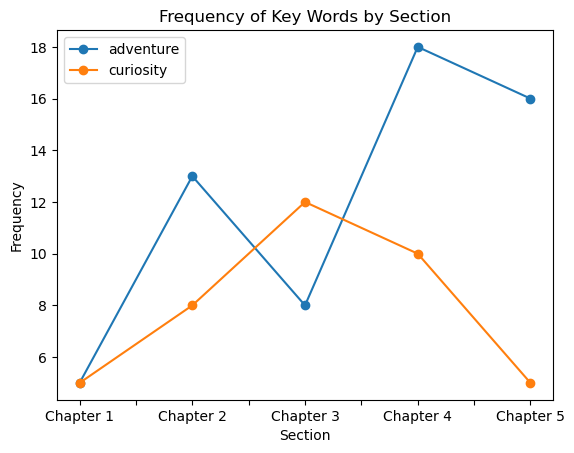

In [57]:
# Assuming you've split the text into sections and have word counts for each section
# Here's a hypothetical approach if you have word frequencies by chapter in a DataFrame

import numpy as np
sections = ['Chapter 1', 'Chapter 2', 'Chapter 3', 'Chapter 4', 'Chapter 5']
section_word_counts = {'adventure': np.random.randint(5, 20, len(sections)), 
                       'curiosity': np.random.randint(5, 15, len(sections))}
trends_df = pd.DataFrame(section_word_counts, index=sections)

trends_df.plot(marker='o')
plt.title('Frequency of Key Words by Section')
plt.xlabel('Section')
plt.ylabel('Frequency')
plt.show()
